In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="color:blue;">Load Dataset</h3>

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 421s 2us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_train[:5], y_test[:5]

(array([6, 9, 9, 4, 1], dtype=uint8), array([3, 8, 8, 0, 6], dtype=uint8))

<h3 style="color:red;">Image Classes</h3>

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

<h3 style="color:blue;">Plot Images</h3>

In [14]:
def show_image(x,y,index):
    plt.figure(figsize=(10,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

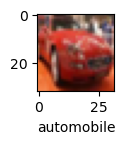

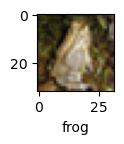

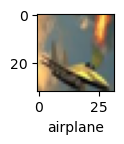

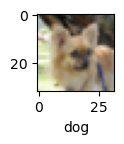

In [16]:
show_image(x_train,y_train,5)
show_image(x_train,y_train,4606)
show_image(x_test,y_test,125)
show_image(x_test,y_test,421)

### <li style="color:blue;">Normalizing image</li>

In [17]:
x_train[0] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
x_train = x_train / 255
x_test = x_test / 255

x_train.shape

(50000, 32, 32, 3)

In [19]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### <li style="color:purple;">Building Simple ANN to classify images</li>

In [24]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
    
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.8162 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.6249 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.5454 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4837 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4340 - accuracy: 0.4953


### <li style="color:purple;">Printing Evaluation Metrix</li>

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = ann.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [27]:
y_pred_classes = [np.argmax(i) for i in predictions]

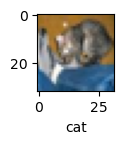

'cat'

In [30]:
show_image(x_test,y_test,0)
classes[y_pred_classes[0]]

In [32]:
print("classifiaction report:\n",classification_report(y_test,y_pred= y_pred_classes))

classifiaction report:
               precision    recall  f1-score   support

           0       0.45      0.65      0.53      1000
           1       0.61      0.62      0.62      1000
           2       0.41      0.22      0.29      1000
           3       0.41      0.26      0.32      1000
           4       0.34      0.60      0.44      1000
           5       0.37      0.40      0.38      1000
           6       0.54      0.46      0.50      1000
           7       0.56      0.51      0.53      1000
           8       0.61      0.59      0.60      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



### <li style="color:purple;">Now Building Simple CNN model to classify images</li>

In [34]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [37]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4435 - accuracy: 0.4821
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0810 - accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9508 - accuracy: 0.6677
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8614 - accuracy: 0.7000
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7960 - accuracy: 0.7229
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7286 - accuracy: 0.7479
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6759 - accuracy: 0.7630
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6271 - accuracy: 0.7806
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5834 - accuracy: 0.7954
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [35]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11666221886731154873
 xla_global_id: -1]

In [39]:
predictions = [np.argmax(i) for i in cnn.predict(x_test)]

313/313 [==============================] - 3s 9ms/step


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1000
           1       0.81      0.80      0.81      1000
           2       0.62      0.56      0.59      1000
           3       0.49      0.49      0.49      1000
           4       0.66      0.63      0.64      1000
           5       0.61      0.62      0.61      1000
           6       0.71      0.81      0.76      1000
           7       0.81      0.74      0.77      1000
           8       0.84      0.78      0.81      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



cat


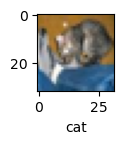

In [46]:
print(classes[predictions[0]])
show_image(x_test,y_test,0)

In [48]:
import joblib

joblib.dump(cnn,'cifar10_cnn.h5')

['cifar10_cnn.h5']